In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_csv(r"data/spam.csv", encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# drops a column
df.drop(columns= ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace= True)

In [4]:
df.sample(5)

,v1,v2
3937,ham,WHEN THE FIRST STRIKE IS A RED ONE. THE BIRD +...
4806,spam,PRIVATE! Your 2004 Account Statement for 07849...
1031,ham,Yup bathe liao...
5558,ham,"Sorry, I'll call later"
1151,ham,"Sorry, I'll call later"


In [5]:
# renaming columns
df.rename(columns= {'v1' : 'target', 'v2' : 'text'}, inplace=True)
df.sample(5)

,target,text
4889,ham,Sounds like there could be a lot of time spent...
2734,ham,Can you do a mag meeting this avo at some point?
4762,ham,Prepare to be pleasured :)
825,ham,Hmm .. Bits and pieces lol ... *sighs* ...
2835,ham,Nice.nice.how is it working?


In [6]:
encoder = LabelEncoder()

In [7]:
df['target'] = encoder.fit_transform(df['target'])

In [8]:
df.sample(5)

,target,text
1117,1,"449050000301 You have won a å£2,000 price! To ..."
5316,0,Jus finish watching tv... U?
4779,0,Sen told that he is going to join his uncle fi...
949,0,Is that what time you want me to come?
5371,0,"Lol, oh you got a friend for the dog ?"


In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check for duplicates values
df.duplicated().sum()

np.int64(403)

In [12]:
df.shape

(5572, 2)

In [13]:
# EDA 
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_charecters'] = df['text'].apply(len)

In [17]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
print(df.columns)

Index(['target', 'text', 'num_charecters'], dtype='object')


In [19]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(str(x).split()))

In [20]:
df

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30
5568,0,Will Ì_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [21]:
df['num_sentences'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]', str(x))))

In [22]:
df.head()

,target,text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,8
1,0,Ok lar... Joking wif u oni...,29,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [23]:
df[df['target'] == 0][['num_charecters', 'num_words', 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,14.200622,2.423627
std,58.016023,11.424511,2.871708
min,2.000000,1.000000,0.000000
25%,33.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,92.000000,19.000000,3.000000
max,910.000000,171.000000,42.000000


In [24]:
df[df['target'] == 1][['num_charecters', 'num_words', 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,23.851406,3.046854
std,29.183082,5.811898,1.914163
min,13.000000,2.000000,0.000000
25%,132.500000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,13.000000


<Axes: xlabel='num_charecters', ylabel='Count'>

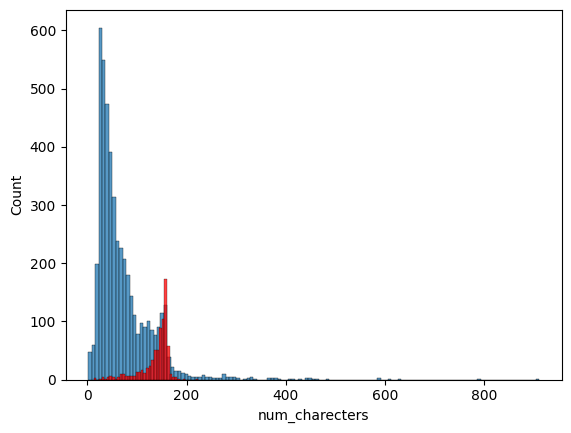

In [25]:
sns.histplot(df[df['target'] == 0]['num_charecters'])
sns.histplot(df[df['target'] == 1]['num_charecters'], color= 'red')

<Axes: xlabel='num_words', ylabel='Count'>

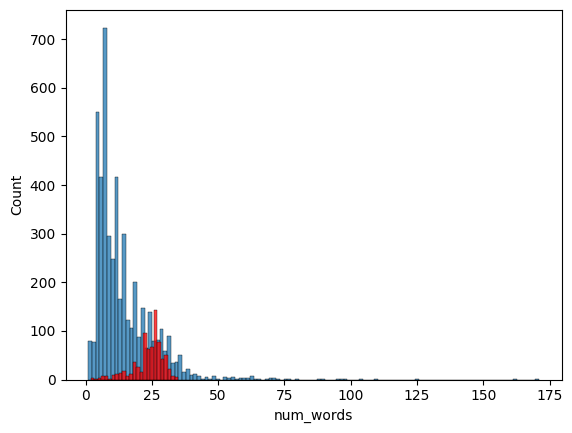

In [26]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color= 'red')

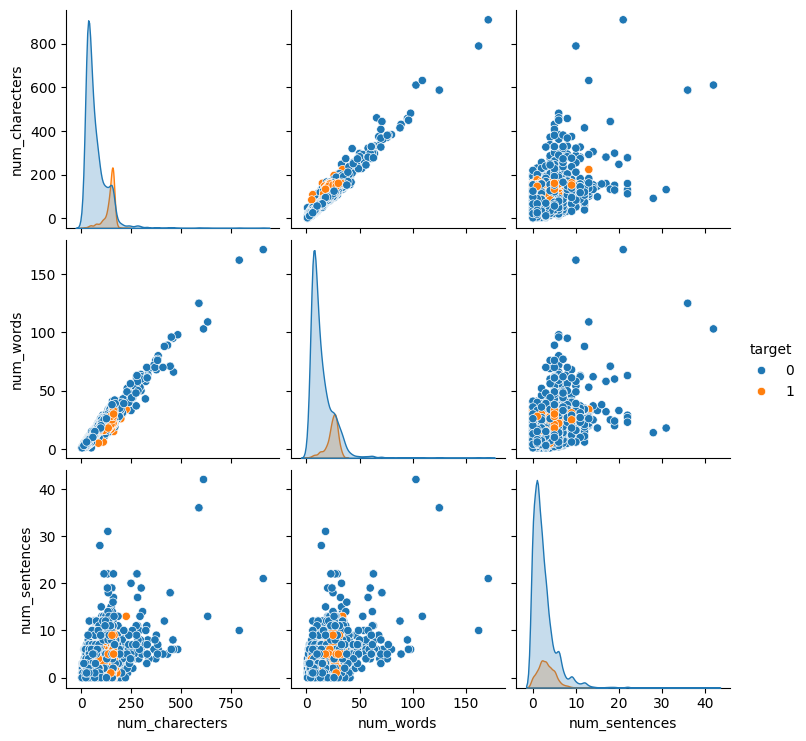

In [27]:
sns.pairplot(df, hue= 'target')

<Axes: >

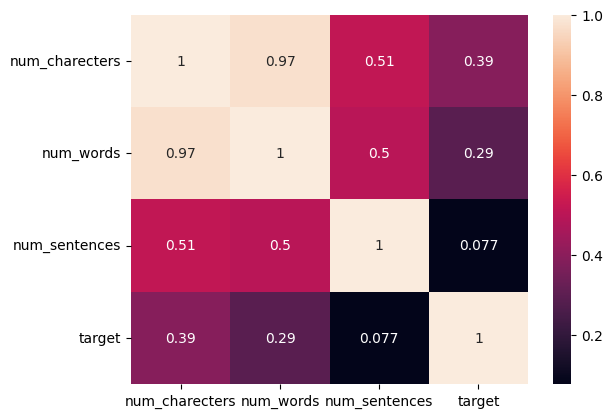

In [28]:
sns.heatmap(df[['num_charecters', 'num_words', 'num_sentences', 'target']].corr(), annot= True)


In [29]:
def transform_txt(text):
    text = text.lower()
    
    return text

In [30]:
transform_txt('HOW ARE YOU BROTHER')


'how are you brother'

In [31]:
def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():                 # keep only alphabets+numbers
            y.append(i)

    text = y[:]                         # copy list
    y.clear()

    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [34]:
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [35]:
transform_text("Hi!!!! how are   YOU??? 123")

'hi 123 hi how are you 123'

In [36]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [37]:
ps = PorterStemmer()
ps.stem('dansing')

'dans'

In [38]:
df['transformed_text'] = df['text'].apply(transform_text)

In [39]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,8,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,6,6,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,6,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goes usf lives around though nah i d...


In [40]:
from wordcloud import WordCloud

In [41]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [42]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep= " "))

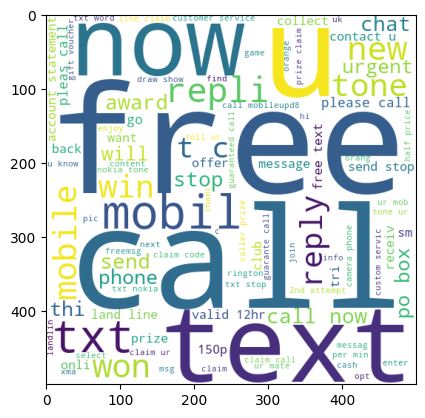

In [43]:
plt.imshow(spam_wc)

In [44]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [45]:
len(spam_corpus)

28156

In [46]:
# create a dictionary
from collections import Counter

In [47]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,711
1,to,687
2,free,438
3,a,375
4,2,348
5,txt,325
6,you,296
7,ur,288
8,u,282
9,your,278


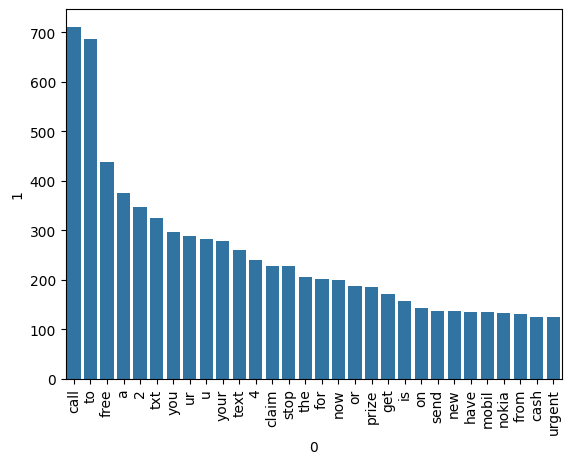

In [48]:
temp = pd.DataFrame(Counter(spam_corpus).most_common(30))

sns.barplot(x=temp[0], y=temp[1])
plt.xticks(rotation=90)
plt.show()


In [49]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [50]:
len(ham_corpus)

105627

In [51]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,i,2851
1,u,1958
2,you,1932
3,to,1554
4,the,1118
5,a,1048
6,it,912
7,and,855
8,in,814
9,me,774


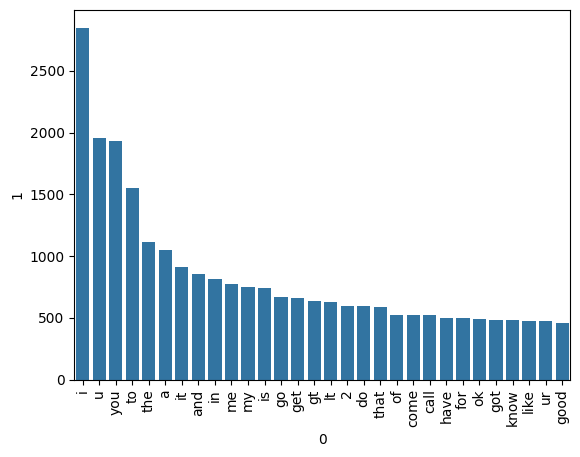

In [52]:
temp = pd.DataFrame(Counter(ham_corpus).most_common(30))

sns.barplot(x=temp[0], y=temp[1])
plt.xticks(rotation=90)
plt.show()

# model 

In [53]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [55]:
X.shape

(5572, 10067)

In [56]:
y = df['target'].values

In [57]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8959641255605382
[[872  85]
 [ 31 127]]
0.5990566037735849


In [61]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9479820627802691
[[957   0]
 [ 58 100]]
1.0


In [62]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9713004484304932
[[954   3]
 [ 29 129]]
0.9772727272727273


In [63]:
# We are choose a tfibf --> mnb

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier


In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)

knc = KNeighborsClassifier()

mnb = MultinomialNB()

dtc = DecisionTreeClassifier(max_depth=5)

lrc = LogisticRegression(solver='liblinear', penalty='l1')

rfc = RandomForestClassifier(n_estimators=50, random_state=2)

abc = AdaBoostClassifier(n_estimators=50, random_state=2)

bc = BaggingClassifier(n_estimators=50, random_state=2)

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

xgb = XGBClassifier(n_estimators=50, random_state=2)


In [66]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb

}


In [67]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [68]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)


In [69]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9713004484304932, 0.9921875)

In [70]:

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    print("-----------------------------------")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    


For SVC
Accuracy: 0.9713004484304932
Precision: 0.9921875
-----------------------------------
For KN
Accuracy: 0.8968609865470852
Precision: 1.0
-----------------------------------
For NB
Accuracy: 0.9479820627802691
Precision: 1.0
-----------------------------------
For DT
Accuracy: 0.9327354260089686
Precision: 0.8608695652173913
-----------------------------------
For LR
Accuracy: 0.9488789237668162
Precision: 0.963302752293578
-----------------------------------
For RF
Accuracy: 0.9659192825112107
Precision: 1.0
-----------------------------------
For AdaBoost
Accuracy: 0.9264573991031391
Precision: 0.9418604651162791
-----------------------------------
For BgC
Accuracy: 0.9605381165919282
Precision: 0.9384615384615385
-----------------------------------
For ETC
Accuracy: 0.968609865470852
Precision: 1.0
-----------------------------------
For GBDT
Accuracy: 0.9479820627802691
Precision: 0.9807692307692307
-----------------------------------
For xgb
Accuracy: 0.9704035874439462
Pre

In [71]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values(by='Precision', ascending=False)


In [72]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896861,1.000000
2,NB,0.947982,1.000000
5,RF,0.965919,1.000000
8,ETC,0.968610,1.000000
0,SVC,0.971300,0.992188
10,xgb,0.970404,0.992126
9,GBDT,0.947982,0.980769
4,LR,0.948879,0.963303
6,AdaBoost,0.926457,0.941860
7,BgC,0.960538,0.938462
